In [32]:
from availability_estimation import *
import graphbuilder_v2
import ast
# import pyogrio
# import fiona

# Связность между адм. центрами ЛО 

In [4]:
citygraph = nx.read_graphml('/Users/polina/Desktop/don/graphmls/uds_graph_with_reg.graphml')

# тут дополнительно обрабатывваю так как граф не с осм а склеенный
citygraph = nx.MultiDiGraph(citygraph)
citygraph.graph['graph_type'] = 'car graph'
citygraph.graph['car speed']= '283.33'  
for node,data in citygraph.nodes(data=True):
    data['x'] = str(ast.literal_eval(node)[0])
    data['y'] = str(ast.literal_eval(node)[1])

node_mapping = {node: int(i) for i,node in enumerate(citygraph.nodes())}
citygraph = nx.relabel_nodes(citygraph, node_mapping)

for node,data in enumerate(citygraph.nodes(data=True)):
    data[1]['nodeID'] = node

citygraph = prepare_graph(citygraph)
city_points = gpd.read_file("/Users/polina/Desktop/don/gdfs/admin_centers_LO_188_points.geojson") 
polygons_gpsp = gpd.read_file('polygons188.geojson')
polygons_mo= gpd.read_file('polygons18.geojson')

In [5]:
adj_mx = availability_matrix(citygraph,city_points)
p = find_median(city_points,adj_mx)

2024-05-18 13:38:39.034 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:90 - Creating adjacency matrix based on provided graph...
2024-05-18 13:38:46.241 | DEBUG    | dongraphio.base_models.matrix_logic:get_adjacency_matrix:52 - Calculating distances from buildings to services ...
2024-05-18 13:38:47.498 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:99 - Adjacency matrix done!


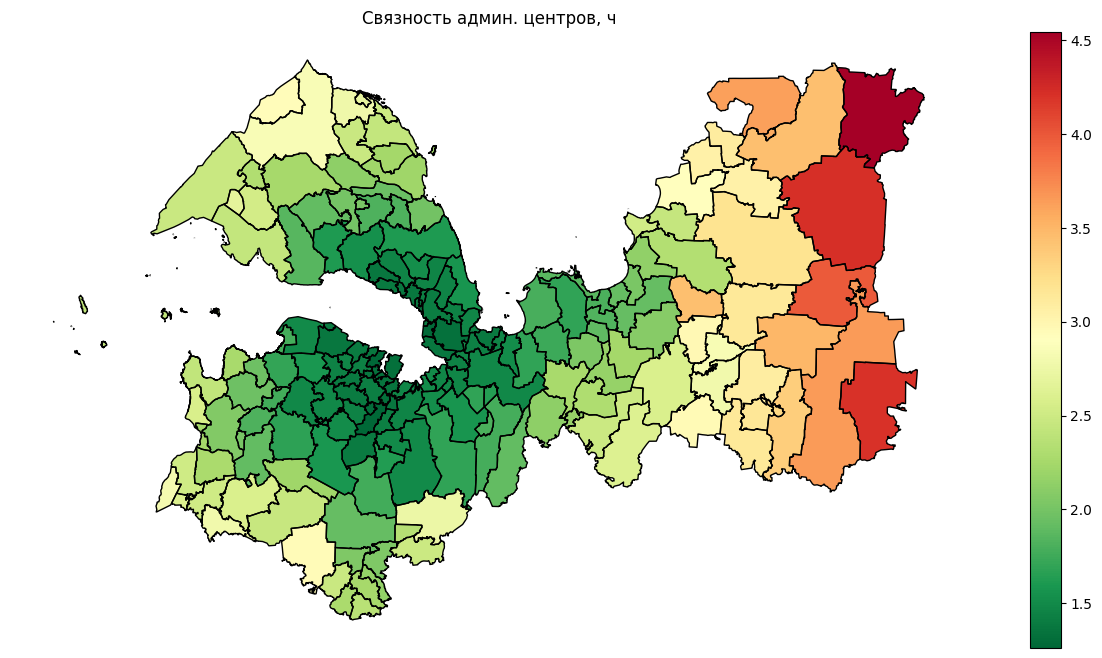

In [6]:
visualize_availability(p,polygons_gpsp,title='Связность админ. центров, ч')

# Доступность сервисов в ЛО

In [7]:
citygraph = nx.read_graphml('/Users/polina/Desktop/don/graphmls/uds_graph_with_reg.graphml')

# тут дополнительно обрабатывваю так как граф не с осм а склеенный
citygraph = nx.MultiDiGraph(citygraph)
citygraph.graph['graph_type'] = 'car graph'
citygraph.graph['car speed']= '283.33'  
for node,data in citygraph.nodes(data=True):
    data['x'] = str(ast.literal_eval(node)[0])
    data['y'] = str(ast.literal_eval(node)[1])

node_mapping = {node: int(i) for i,node in enumerate(citygraph.nodes())}
citygraph = nx.relabel_nodes(citygraph, node_mapping)

for node,data in enumerate(citygraph.nodes(data=True)):
    data[1]['nodeID'] = node

citygraph = prepare_graph(citygraph)
city_points = gpd.read_file('points.geojson')
polygons_gpsp = gpd.read_file('polygons188.geojson')
polygons_mo= gpd.read_file('polygons18.geojson')

In [8]:
# AVAILABLE SERVICES

stops = gpd.read_file('/Users/polina/Desktop/don/gdfs/ЖД остановки.geojson')

fuel = gpd.read_file('/Users/polina/Desktop/don/gdfs/fuel.geojson')

spb = ox.geocode_to_gdf('N27490597', by_osmid=True)  # СПб

ferry = gpd.read_file('/Users/polina/Desktop/don/gdfs/water_transport_LO.geojson')

aero = gpd.read_file('/Users/polina/Desktop/don/gdfs/airports_local_LO.geojson')

## Доступность ЖД остановок

In [9]:
adj_mx = availability_matrix(citygraph,city_points, stops)
p = find_nearest(city_points,adj_mx)

2024-05-18 13:39:10.607 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:90 - Creating adjacency matrix based on provided graph...
2024-05-18 13:39:17.543 | DEBUG    | dongraphio.base_models.matrix_logic:get_adjacency_matrix:52 - Calculating distances from buildings to services ...
2024-05-18 13:39:47.771 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:99 - Adjacency matrix done!


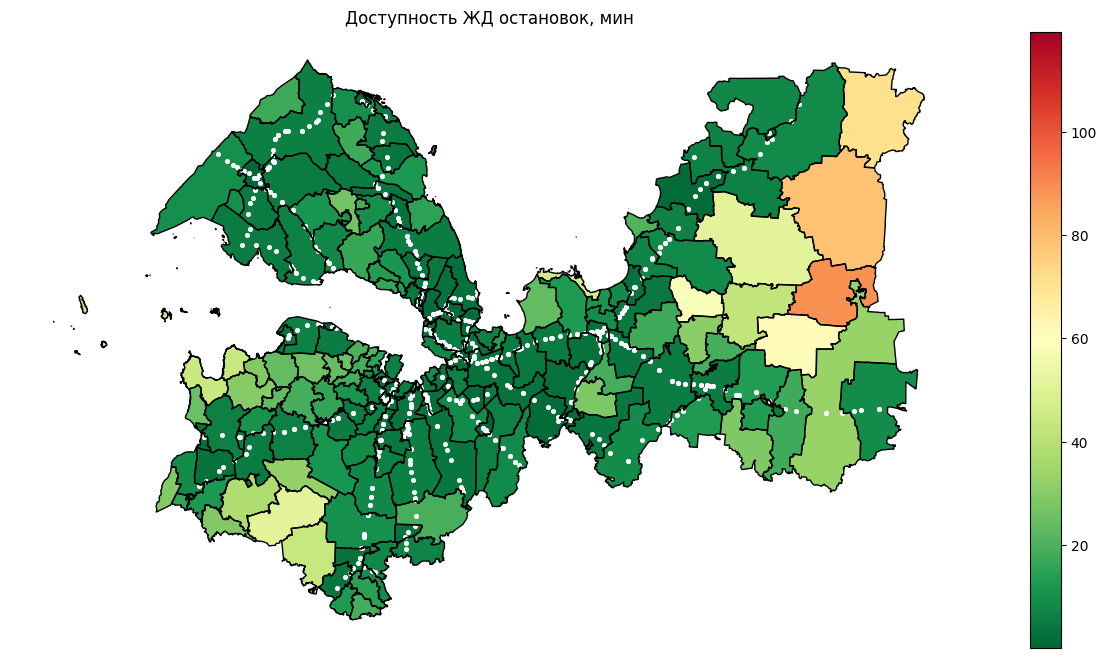

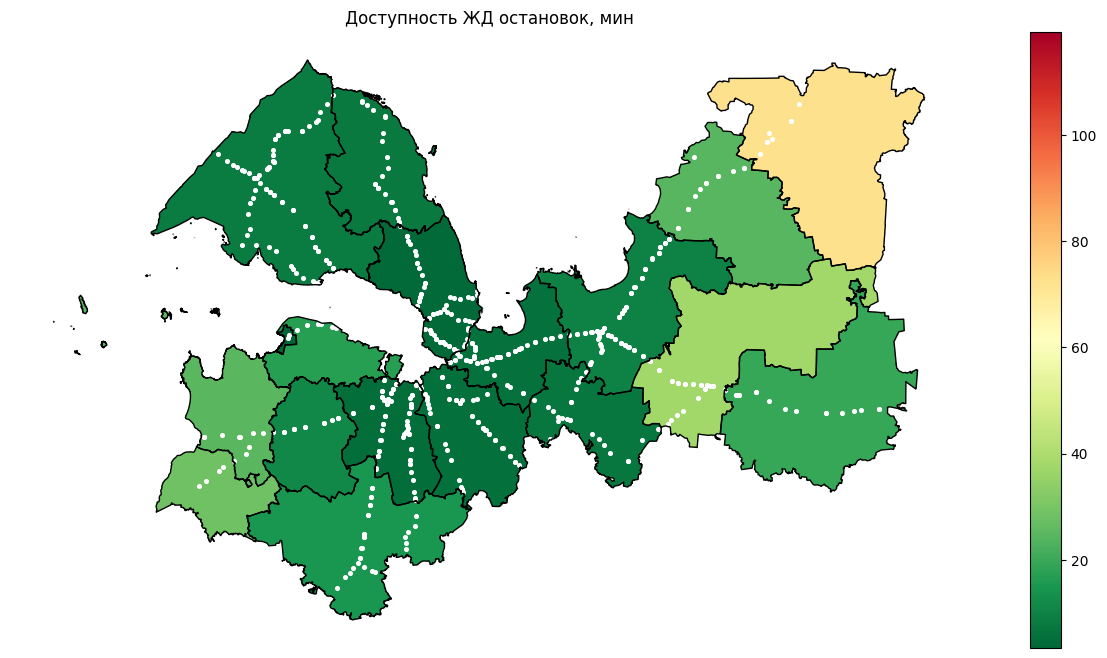

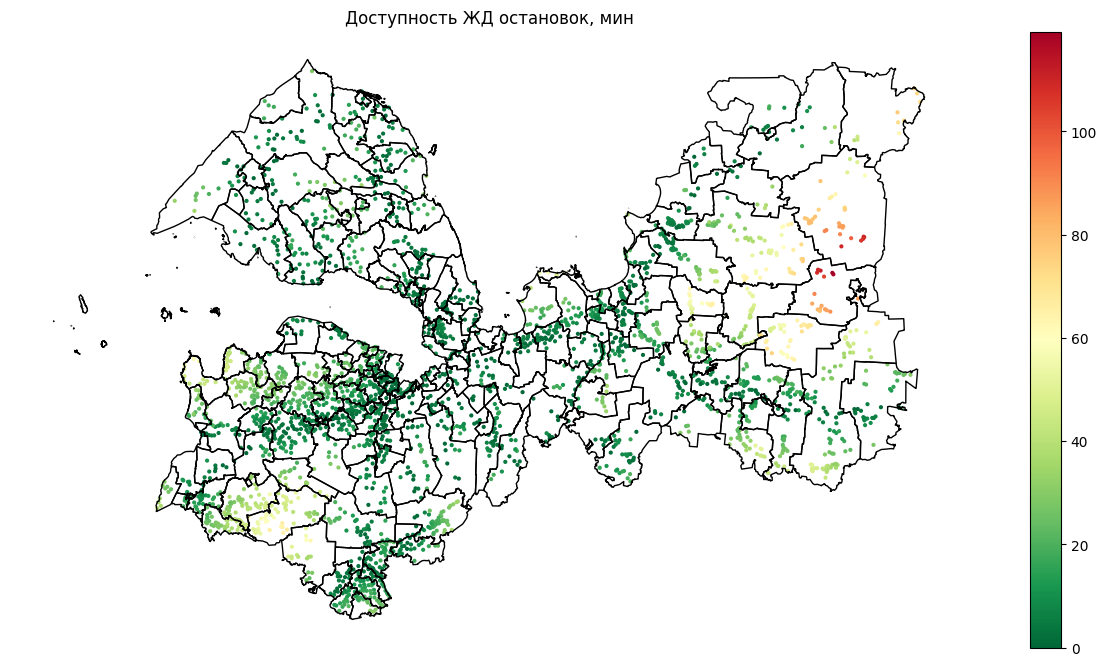

In [10]:
visualize_availability(p,polygons_gpsp,title='Доступность ЖД остановок, мин',service_gdf=stops)
visualize_availability(p,polygons_mo,title='Доступность ЖД остановок, мин',service_gdf=stops)
visualize_availability(p,polygons_gpsp,title='Доступность ЖД остановок, мин',median=False)

## Доступность АЗС

In [11]:
adj_mx = availability_matrix(citygraph,city_points, fuel)
p = find_nearest(city_points,adj_mx)

2024-05-18 13:39:48.900 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:90 - Creating adjacency matrix based on provided graph...
2024-05-18 13:39:58.268 | DEBUG    | dongraphio.base_models.matrix_logic:get_adjacency_matrix:52 - Calculating distances from buildings to services ...
2024-05-18 13:40:14.116 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:99 - Adjacency matrix done!


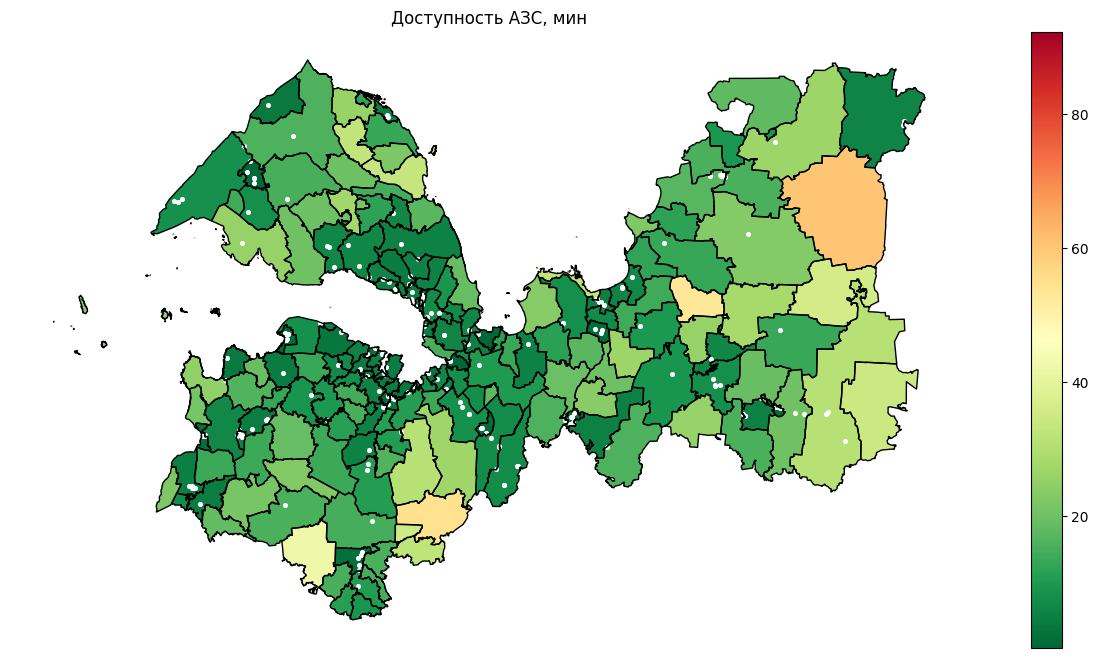

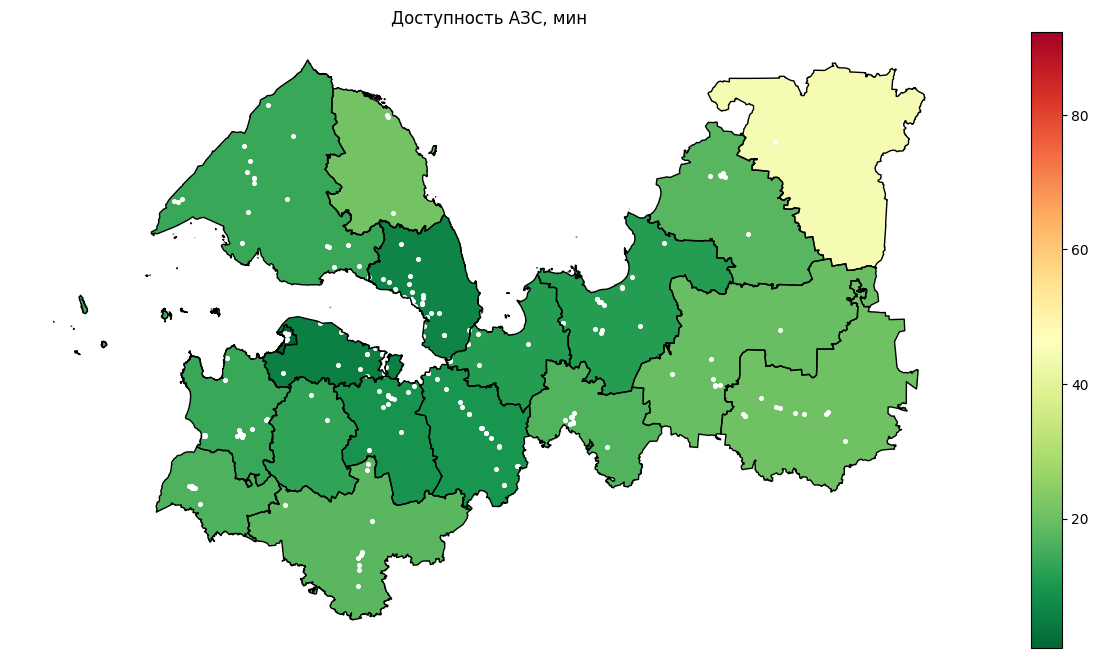

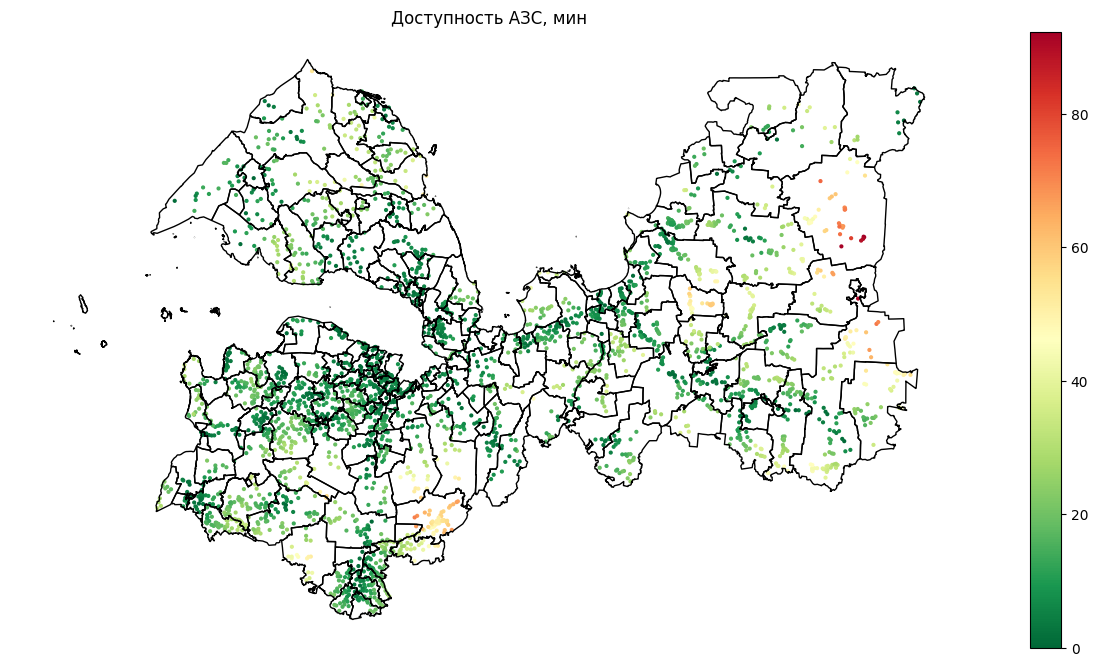

In [12]:
visualize_availability(p,polygons_gpsp,title='Доступность АЗС, мин',service_gdf=fuel)
visualize_availability(p,polygons_mo,title='Доступность АЗС, мин',service_gdf=fuel)
visualize_availability(p,polygons_gpsp,title='Доступность АЗС, мин',median=False)

## Доступность объектов водного траснпорта

In [13]:
adj_mx = availability_matrix(citygraph,city_points, ferry)
p = find_nearest(city_points,adj_mx)

2024-05-18 13:40:17.270 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:90 - Creating adjacency matrix based on provided graph...
2024-05-18 13:40:25.224 | DEBUG    | dongraphio.base_models.matrix_logic:get_adjacency_matrix:52 - Calculating distances from buildings to services ...
2024-05-18 13:40:29.681 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:99 - Adjacency matrix done!


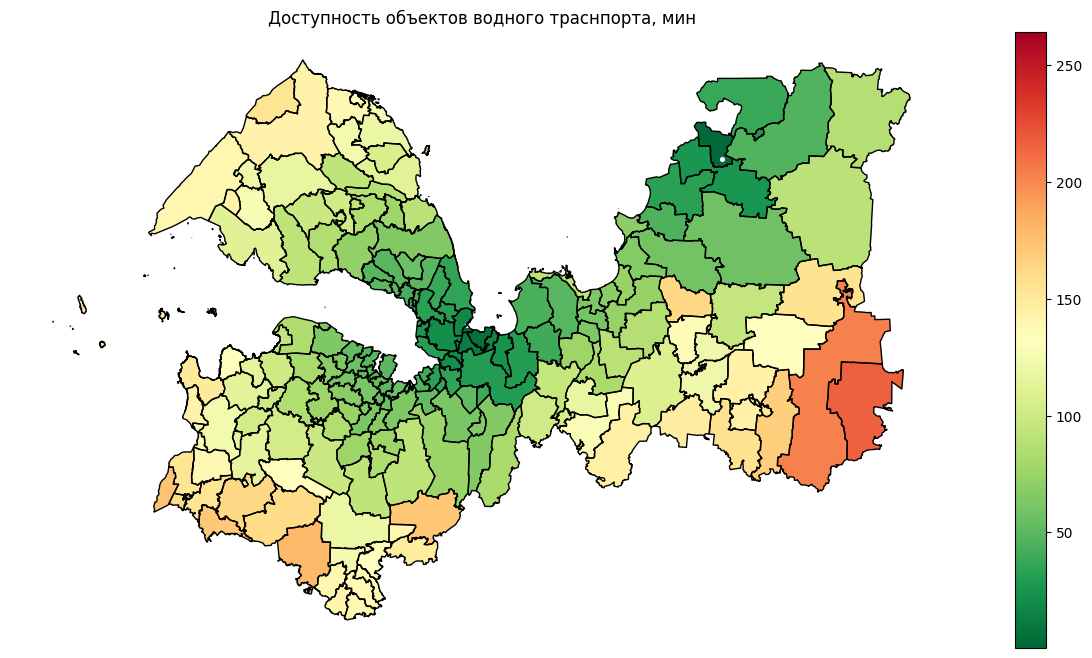

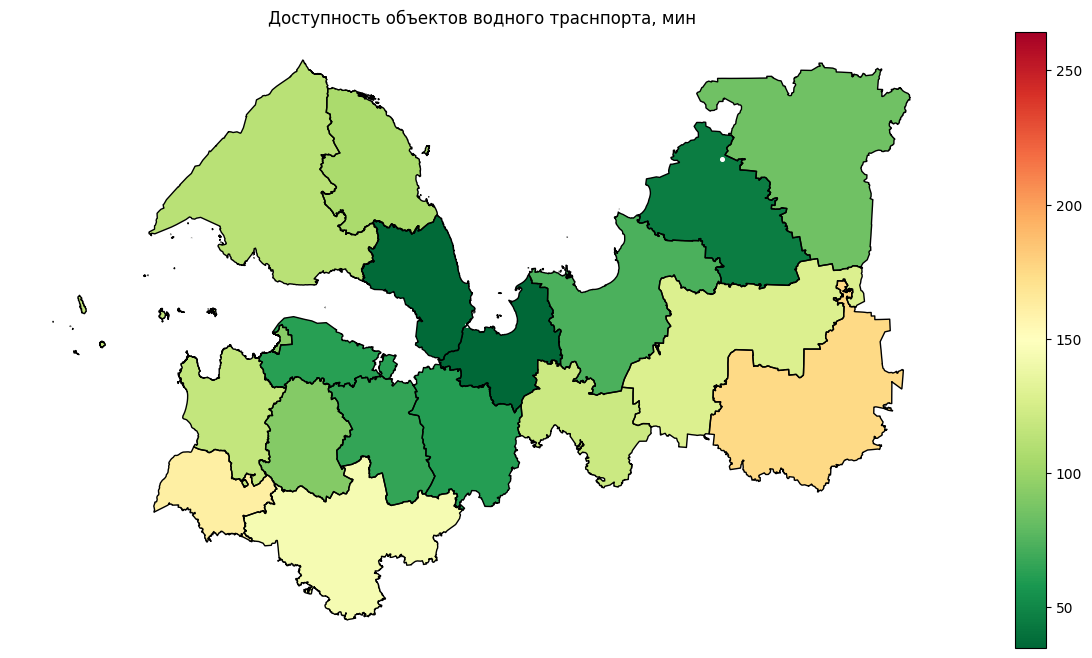

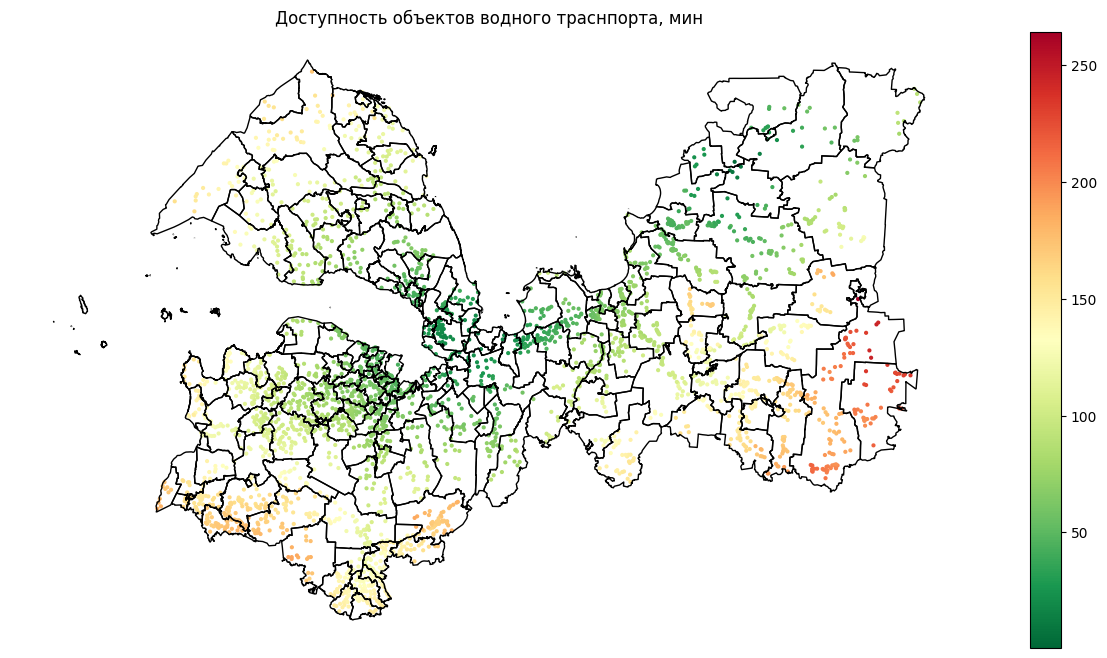

In [14]:
visualize_availability(p,polygons_gpsp,title='Доступность объектов водного траснпорта, мин',service_gdf=ferry)
visualize_availability(p,polygons_mo,title='Доступность объектов водного траснпорта, мин',service_gdf=ferry)
visualize_availability(p,polygons_gpsp,title='Доступность объектов водного траснпорта, мин',median=False)

## Доступность аэропортов

In [15]:
adj_mx = availability_matrix(citygraph,city_points, aero)
p = find_nearest(city_points,adj_mx)

2024-05-18 13:40:30.792 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:90 - Creating adjacency matrix based on provided graph...
2024-05-18 13:40:38.939 | DEBUG    | dongraphio.base_models.matrix_logic:get_adjacency_matrix:52 - Calculating distances from buildings to services ...
2024-05-18 13:40:46.117 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:99 - Adjacency matrix done!


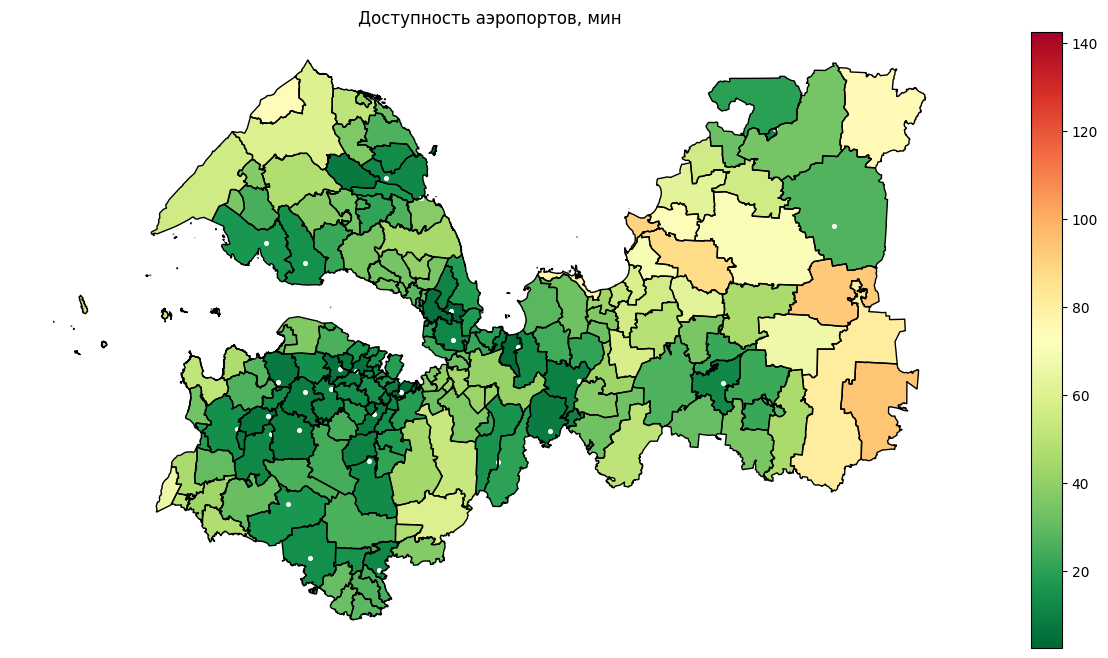

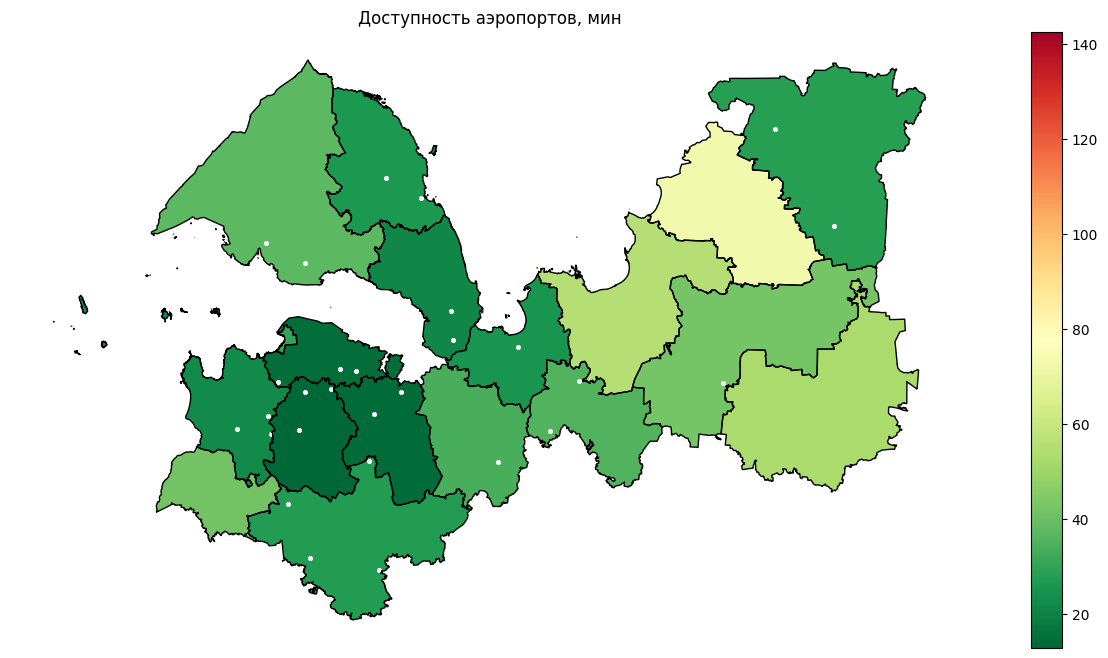

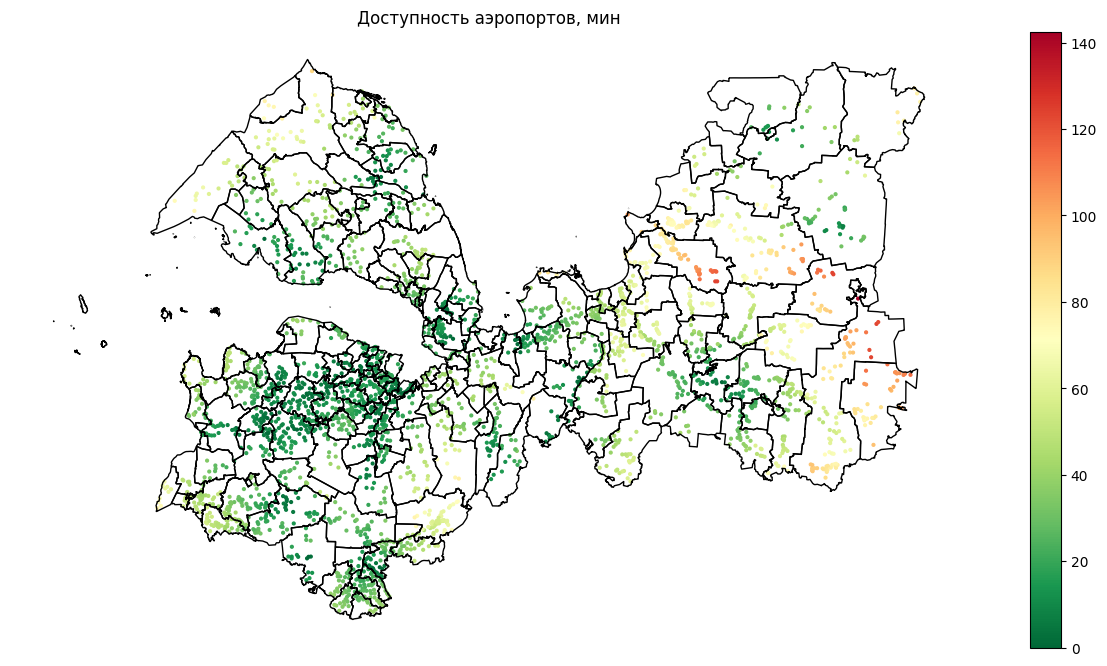

In [16]:
visualize_availability(p,polygons_gpsp,title='Доступность аэропортов, мин',service_gdf=aero)
visualize_availability(p,polygons_mo,title='Доступность аэропортов, мин',service_gdf=aero)
visualize_availability(p,polygons_gpsp,title='Доступность аэропортов, мин',median=False)

## Доступность федеральных трасс

In [17]:
reg1 = get_reg1(citygraph)
adj_mx = availability_matrix(citygraph,city_points, reg1)
p = find_nearest(city_points,adj_mx)

2024-05-18 13:40:48.147 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:90 - Creating adjacency matrix based on provided graph...
2024-05-18 13:40:56.315 | DEBUG    | dongraphio.base_models.matrix_logic:get_adjacency_matrix:52 - Calculating distances from buildings to services ...
2024-05-18 13:44:43.845 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:99 - Adjacency matrix done!


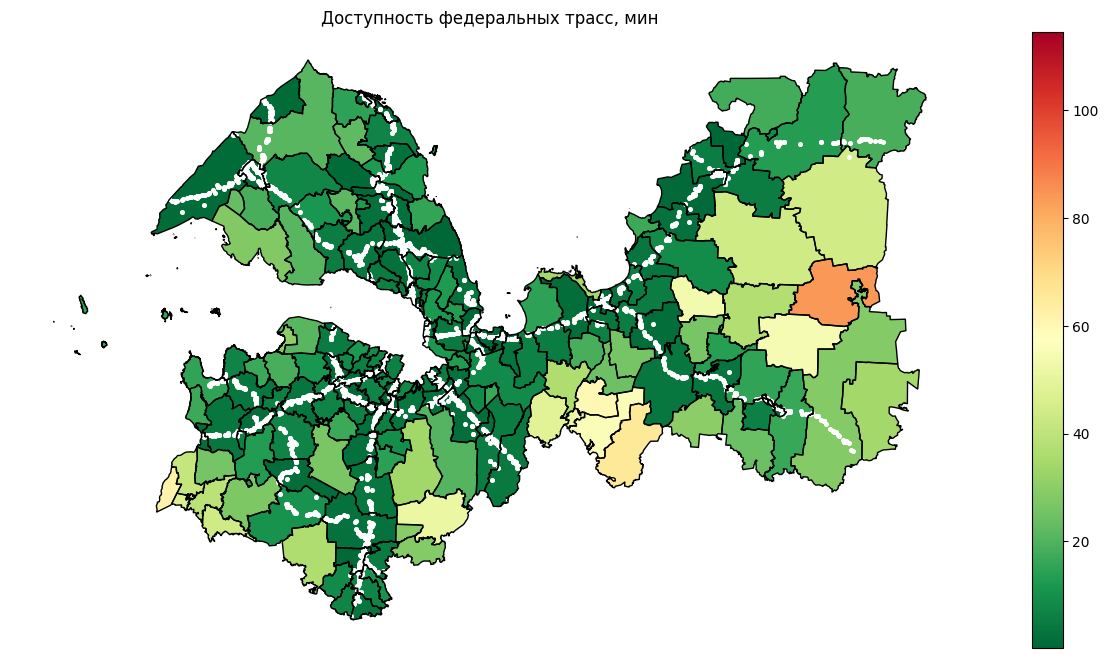

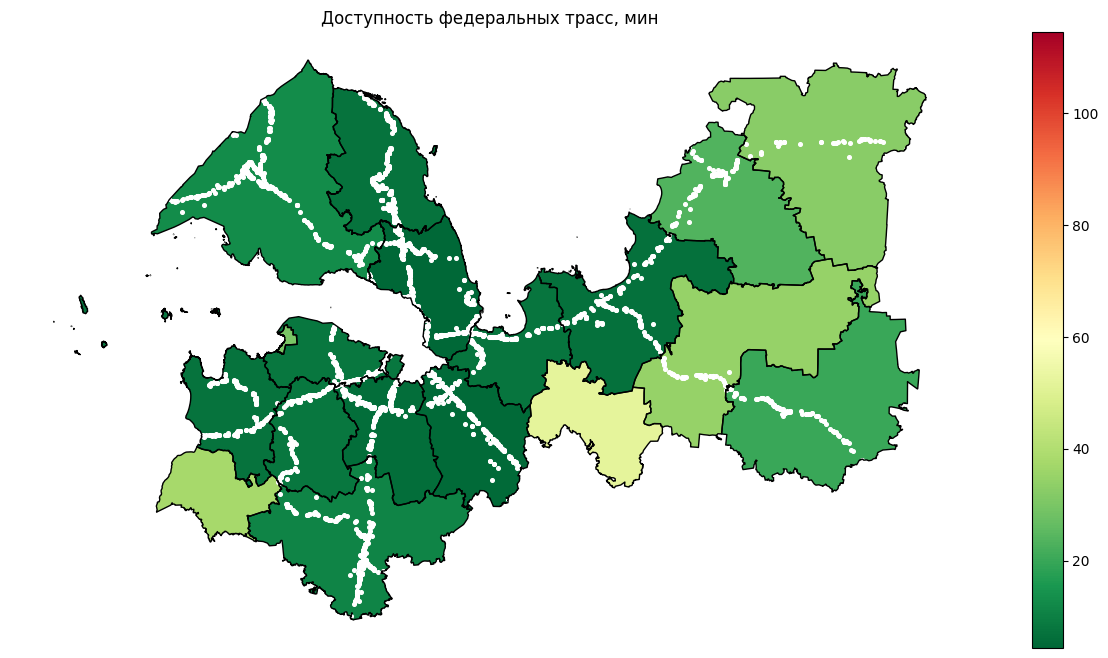

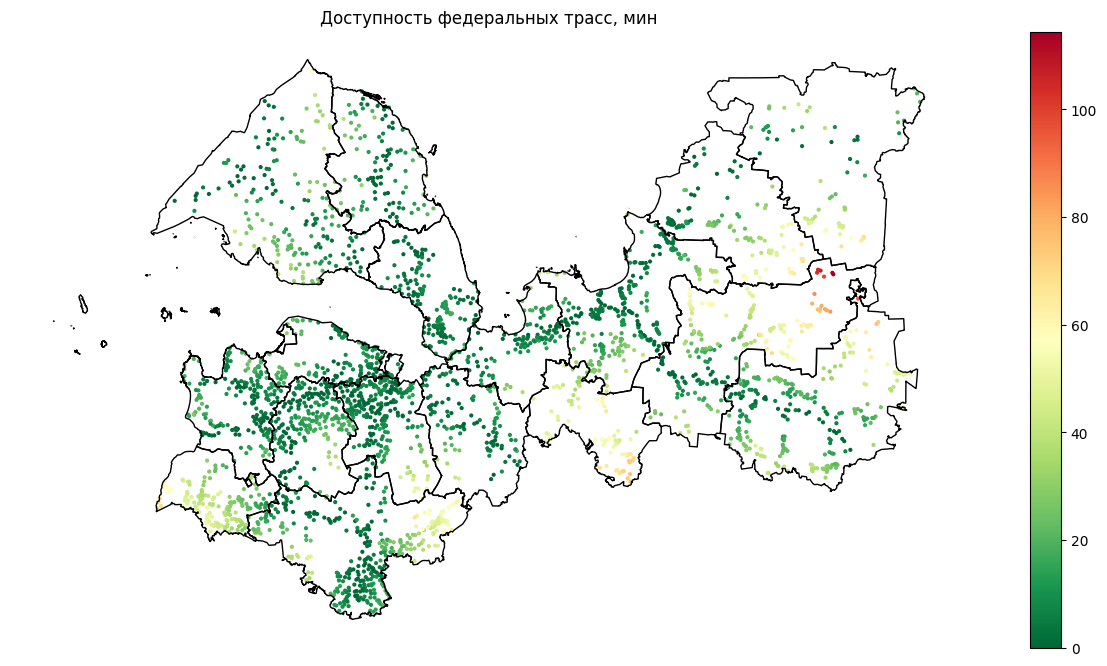

In [18]:
visualize_availability(p,polygons_gpsp,title='Доступность федеральных трасс, мин',service_gdf=reg1)
visualize_availability(p,polygons_mo,title='Доступность федеральных трасс, мин',service_gdf=reg1)
visualize_availability(p,polygons_mo,title='Доступность федеральных трасс, мин',median=False)

## Удаленность от СПБ

In [19]:
adj_mx = availability_matrix(citygraph,city_points, spb, weight='length_meter')
p = find_nearest(city_points,adj_mx)
p['to_service'] = p['to_service']/1000

2024-05-18 13:44:45.060 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:90 - Creating adjacency matrix based on provided graph...
2024-05-18 13:44:53.221 | DEBUG    | dongraphio.base_models.matrix_logic:get_adjacency_matrix:52 - Calculating distances from buildings to services ...
2024-05-18 13:44:54.994 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:99 - Adjacency matrix done!


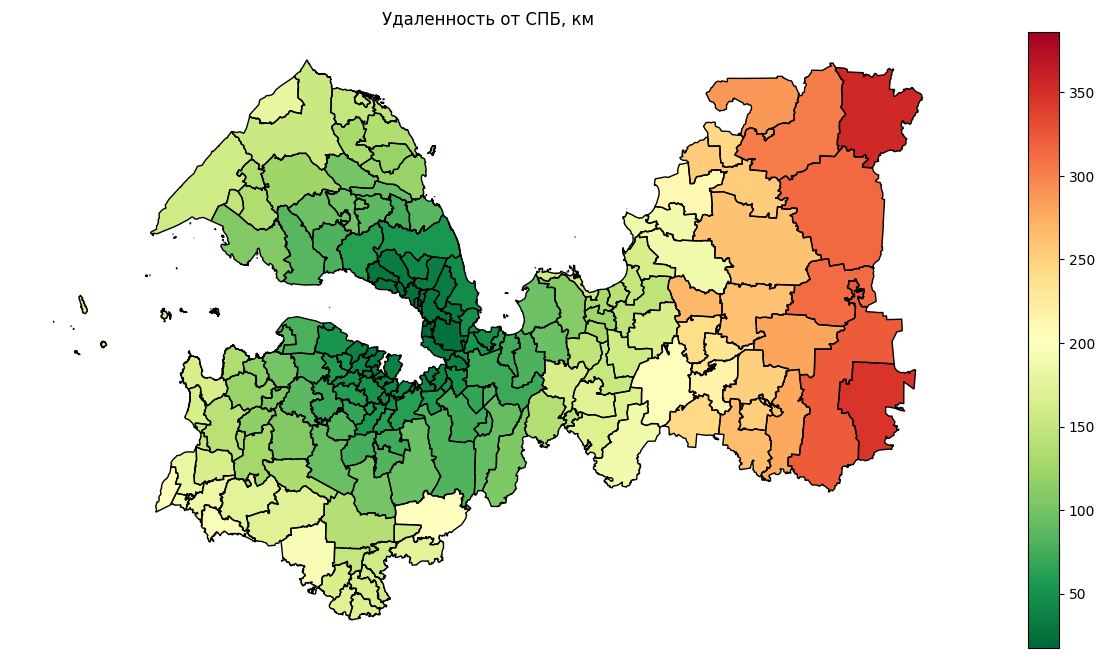

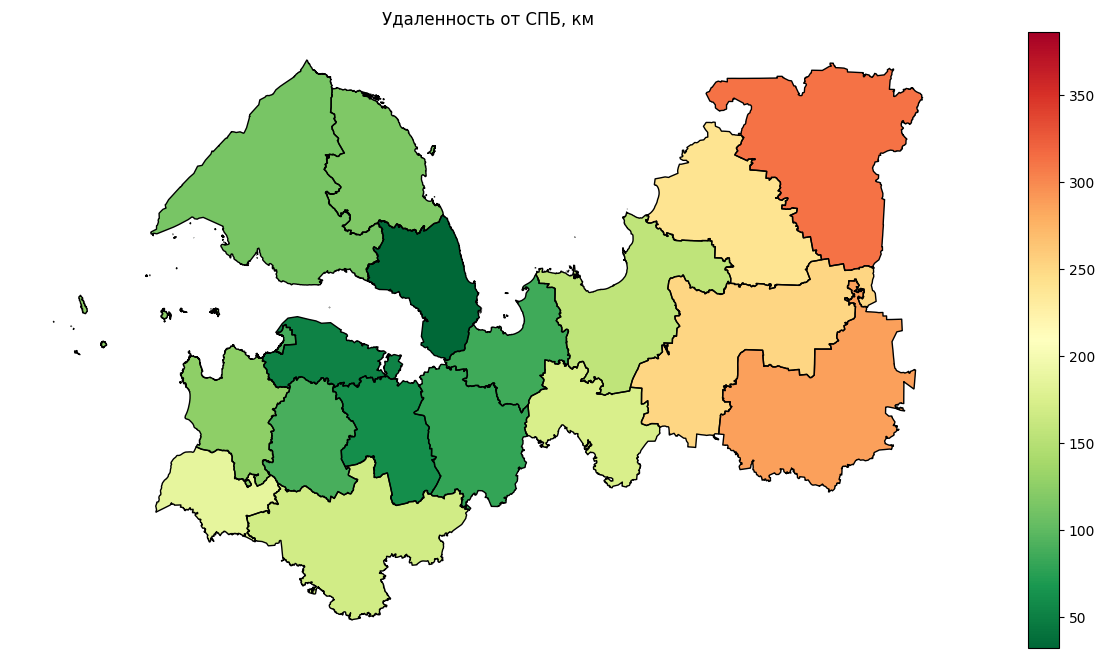

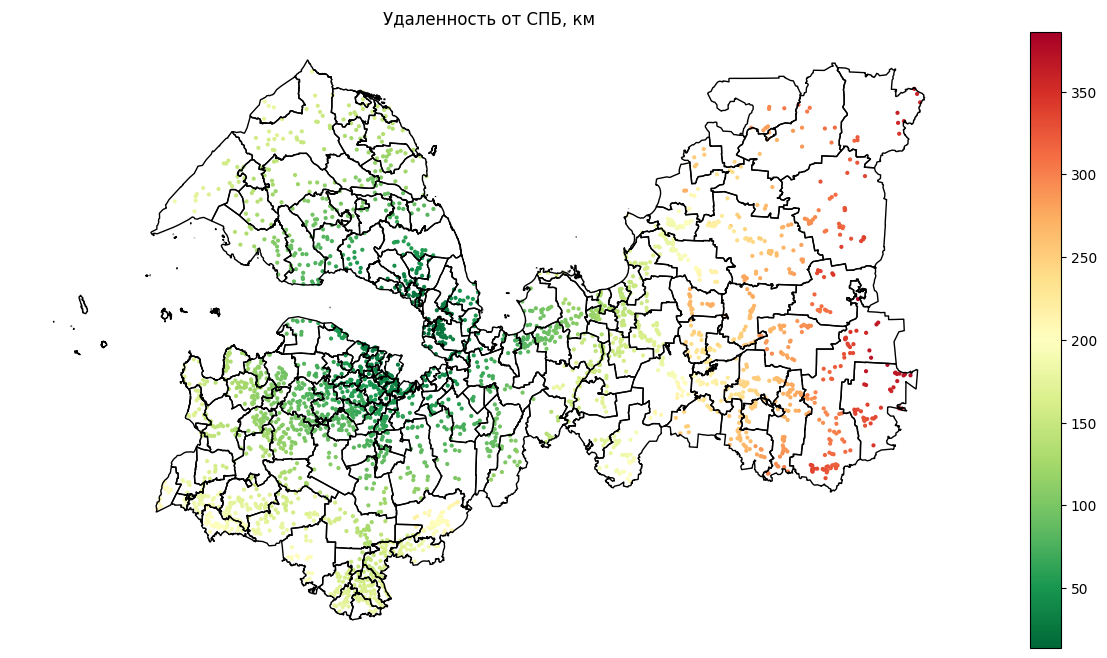

In [20]:
visualize_availability(p,polygons_gpsp,title='Удаленность от СПБ, км',service_gdf=spb)
visualize_availability(p,polygons_mo,title='Удаленность от СПБ, км',service_gdf=spb)
visualize_availability(p,polygons_gpsp,title='Удаленность от СПБ, км',median=False)

# Заправки Вологодской области

## Граф УДС

In [21]:

city = ox.geocode_to_gdf('R115106', by_osmid=True) # ЛО
citygraph = graphbuilder_v2.get_graph_polygon(city.unary_union, crs=32636)
citygraph = prepare_graph(citygraph)

city_points = gpd.read_file('/Users/polina/Desktop/don/vol_settlements.geojson')
polygons_mo= gpd.read_file('/Users/polina/Desktop/don/vol_region_MRs.geojson')
fuel = gpd.read_file('/Users/polina/Desktop/don/vol_fuels.geojson')



/Users/polina/Desktop/github/transport_frames/.venv/lib/python3.10/site-packages/osmnx/_overpass.py:254: UserWarning: This area is 78 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/Users/polina/Desktop/github/transport_frames/Polina/graphbuilder_v2.py:160: UserWarning: Approach is not set. Defaulting to 'primal'.
  nodes, edges = momepy.nx_to_gdf(graph, points=True, lines=True, spatial_weights=False)


In [22]:
adj_mx = availability_matrix(citygraph, city_points, fuel)
p = find_nearest(city_points,adj_mx)

2024-05-18 13:46:55.485 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:90 - Creating adjacency matrix based on provided graph...
2024-05-18 13:46:58.001 | DEBUG    | dongraphio.base_models.matrix_logic:get_adjacency_matrix:52 - Calculating distances from buildings to services ...
2024-05-18 13:47:18.896 | INFO     | dongraphio.dongraphio:get_adjacency_matrix:99 - Adjacency matrix done!


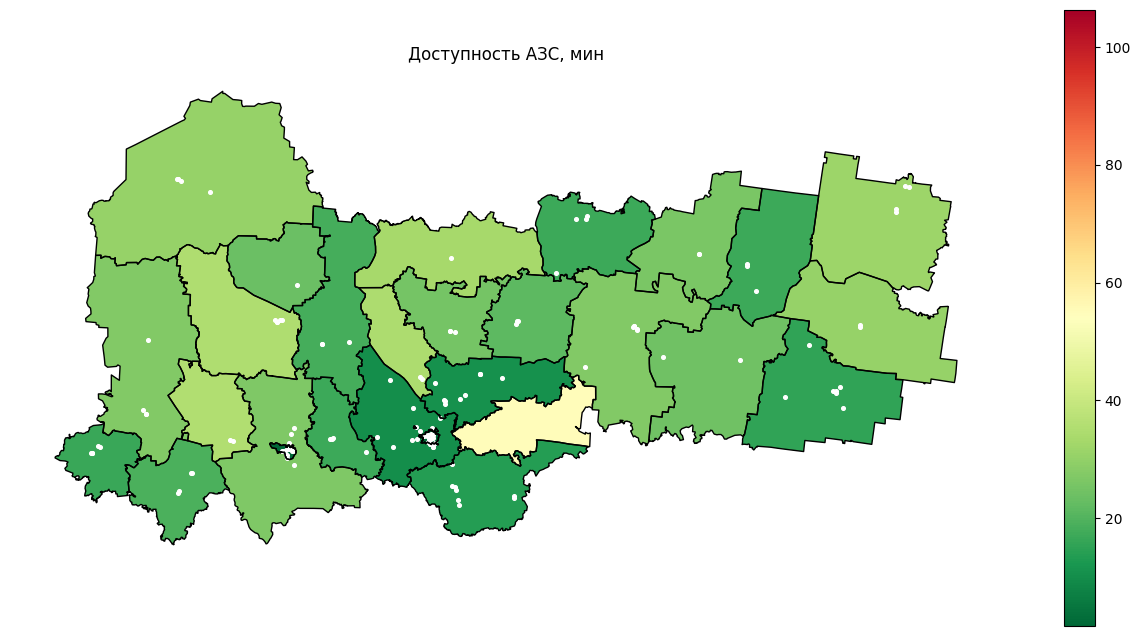

In [23]:
visualize_availability(p,polygons_mo,fuel,title='Доступность АЗС, мин')

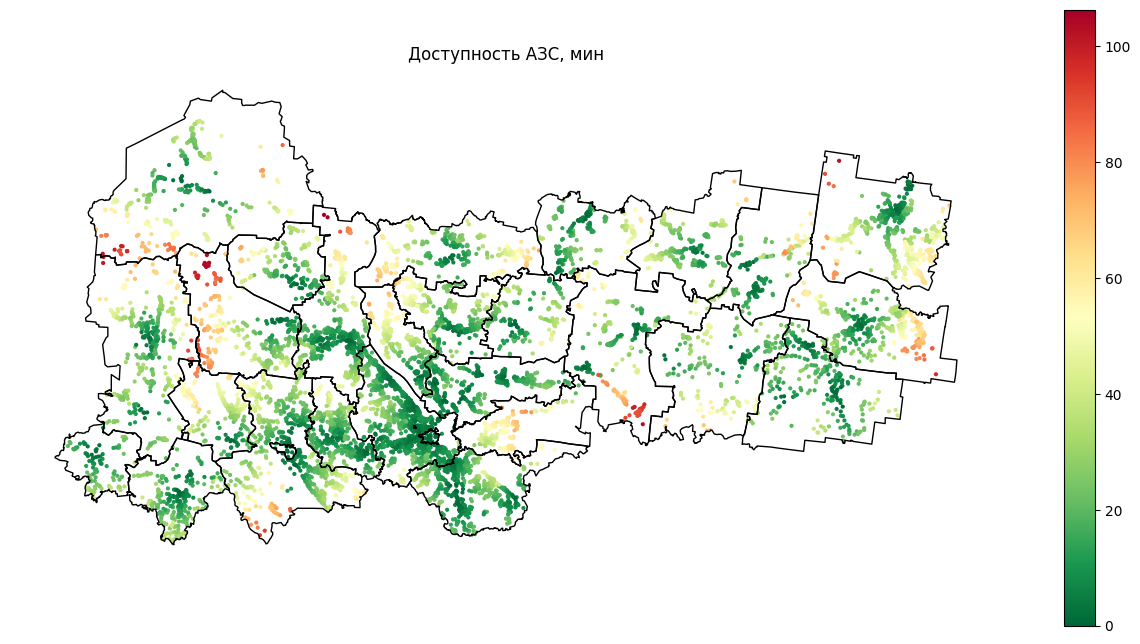

In [24]:
visualize_availability(p,polygons_mo,median=False,title='Доступность АЗС, мин')